<h1>Install mediapipe</h1>

<h1>Initiate path for silat Train Dataset + saving our mediapipe pose keypoints for later</h1>


In [1]:
silat_train_images_dir = 'DATASET'
keypoint_outputs_dir = './coba/'

<h1>Generate pose keypoints for each image in train dataset...</h1>

In [2]:
import cv2
import numpy as np
import os
import tqdm
from mediapipe.python.solutions import drawing_utils as mp_drawing
from mediapipe.python.solutions import pose as mp_pose

In [3]:
pose_class_names = sorted([n for n in os.listdir(silat_train_images_dir)])

In [ ]:
for pose_class_name in pose_class_names:
    image_names = sorted([n for n in os.listdir(os.path.join(silat_train_images_dir, pose_class_name))])

    try:
        os.makedirs(os.path.join(keypoint_outputs_dir, pose_class_name))
    except:
        break

    print("Bootstrapping", pose_class_name)
    for image_name in tqdm.tqdm(image_names):
        input_frame = cv2.imread(os.path.join(silat_train_images_dir, pose_class_name, image_name))
        input_frame = cv2.cvtColor(input_frame, cv2.COLOR_BGR2RGB)

        with mp_pose.Pose() as pose_tracker:
            result = pose_tracker.process(image=input_frame)
            pose_landmarks = result.pose_landmarks

        output_frame = input_frame.copy()
        mp_drawing.draw_landmarks(image=output_frame, landmark_list=pose_landmarks, connections=mp_pose.POSE_CONNECTIONS)

        output_frame = cv2.cvtColor(output_frame, cv2.COLOR_RGB2BGR)
        # cv2.imwrite(os.path.join(train_outputs_dir, image_name), output_frame)

        if pose_landmarks is not None:
            pose_landmarks = [[landmark.x, landmark.y, landmark.z] for landmark in pose_landmarks.landmark]
            frame_height, frame_width = output_frame.shape[:2]

        
            pose_landmarks *= np.array([frame_height, frame_height, frame_width])#untuk mengali x, y, z

            pose_landmarks = np.around(pose_landmarks, 5).flatten().astype(np.float32).tolist()

            npy_savepath = os.path.join(keypoint_outputs_dir, pose_class_name, image_name[0:-4]) # remove any .jpg, .png, etc suffix
            np.save(npy_savepath, pose_landmarks)


In [1]:
import os
import cv2
import numpy as np
import mediapipe as mp
import tqdm
import csv

mp_pose = mp.solutions.pose
mp_drawing = mp.solutions.drawing_utils

silat_train_images_dir = 'DATASET'  # Ganti dengan path asli
pose_class_names = os.listdir(silat_train_images_dir)
csv_output_path = 'keypoints.csv'

all_data = []

for pose_class_name in pose_class_names:
    image_names = sorted([n for n in os.listdir(os.path.join(silat_train_images_dir, pose_class_name))])
    print("Bootstrapping", pose_class_name)

    for image_name in tqdm.tqdm(image_names):
        input_frame = cv2.imread(os.path.join(silat_train_images_dir, pose_class_name, image_name))
        input_frame = cv2.cvtColor(input_frame, cv2.COLOR_BGR2RGB)

        with mp_pose.Pose() as pose_tracker:
            result = pose_tracker.process(image=input_frame)
            pose_landmarks = result.pose_landmarks

        if pose_landmarks is not None:
            landmarks = [[lmk.x, lmk.y, lmk.z] for lmk in pose_landmarks.landmark]
            frame_height, frame_width = input_frame.shape[:2]
            landmarks = np.array(landmarks) * np.array([frame_height, frame_height, frame_width])
            landmarks = np.around(landmarks, 5).flatten().astype(np.float32).tolist()
            
            row = [pose_class_name, image_name] + landmarks
            all_data.append(row)

# Header
header = ['label', 'image']
for i in range(33):
    header += [f'x{i}', f'y{i}', f'z{i}']

# Save to CSV
with open(csv_output_path, 'w', newline='') as f:
    writer = csv.writer(f)
    writer.writerow(header)
    writer.writerows(all_data)

print(f'Saved to {csv_output_path}')


Bootstrapping A1_benar


  0%|          | 0/366 [00:00<?, ?it/s]c:\Users\Windows 10\AppData\Local\Programs\Python\Python311\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
100%|██████████| 366/366 [03:25<00:00,  1.78it/s]


Bootstrapping A1_salah


100%|██████████| 221/221 [01:49<00:00,  2.02it/s]


Bootstrapping A2_benar


100%|██████████| 268/268 [02:13<00:00,  2.01it/s]


Bootstrapping A2_salah


100%|██████████| 275/275 [02:10<00:00,  2.10it/s]


Bootstrapping A3_benar


100%|██████████| 244/244 [01:46<00:00,  2.29it/s]


Bootstrapping A3_salah


100%|██████████| 271/271 [01:56<00:00,  2.33it/s]


Bootstrapping A4_benar


100%|██████████| 228/228 [01:53<00:00,  2.00it/s]


Bootstrapping A4_salah


100%|██████████| 300/300 [02:11<00:00,  2.29it/s]


Bootstrapping A5_benar


100%|██████████| 168/168 [01:13<00:00,  2.28it/s]


Bootstrapping A5_salah


100%|██████████| 205/205 [01:31<00:00,  2.25it/s]


Bootstrapping A6_benar


100%|██████████| 330/330 [02:28<00:00,  2.22it/s]


Bootstrapping A6_salah


100%|██████████| 186/186 [01:30<00:00,  2.06it/s]


Bootstrapping A7_benar


100%|██████████| 214/214 [01:39<00:00,  2.15it/s]


Bootstrapping A7_salah


100%|██████████| 77/77 [00:40<00:00,  1.92it/s]


Saved to keypoints.csv


<h1>Generate our train/test datasets</h1>

In [5]:
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from glob import glob

In [6]:
label_map = {label:num for num,label in enumerate(pose_class_names)}
print(label_map)

{'A1_benar': 0, 'A1_salah': 1, 'A2_benar': 2, 'A2_salah': 3, 'A3_benar': 4, 'A3_salah': 5, 'A4_benar': 6, 'A4_salah': 7, 'A5_benar': 8, 'A5_salah': 9, 'A6_benar': 10, 'A6_salah': 11, 'A7_benar': 12, 'A7_salah': 13}


In [7]:
sequences, labels = [], []

for pose_class_name in pose_class_names:
    keypoint_names = glob(os.path.join(keypoint_outputs_dir, pose_class_name, "*.npy"))

    print("searching through {}".format(pose_class_name))
    for keypoint_name in tqdm.tqdm(keypoint_names):
        file = np.load(keypoint_name)
        sequences.append(file)
        labels.append(label_map[pose_class_name])


searching through A1_benar


100%|██████████| 362/362 [00:00<00:00, 626.28it/s]


searching through A1_salah


100%|██████████| 221/221 [00:00<00:00, 661.62it/s]


searching through A2_benar


100%|██████████| 268/268 [00:00<00:00, 584.76it/s]


searching through A2_salah


100%|██████████| 275/275 [00:00<00:00, 838.58it/s]


searching through A3_benar


100%|██████████| 244/244 [00:00<00:00, 1126.57it/s]


searching through A3_salah


100%|██████████| 271/271 [00:00<00:00, 1133.06it/s]


searching through A4_benar


100%|██████████| 224/224 [00:00<00:00, 821.87it/s]


searching through A4_salah


100%|██████████| 300/300 [00:00<00:00, 1179.21it/s]


searching through A5_benar


100%|██████████| 168/168 [00:00<00:00, 1180.30it/s]


searching through A5_salah


100%|██████████| 205/205 [00:00<00:00, 1222.27it/s]


searching through A6_benar


100%|██████████| 324/324 [00:00<00:00, 1021.77it/s]


searching through A6_salah


100%|██████████| 186/186 [00:00<00:00, 1211.45it/s]


searching through A7_benar


100%|██████████| 212/212 [00:00<00:00, 1265.47it/s]


searching through A7_salah


100%|██████████| 77/77 [00:00<00:00, 682.64it/s]


In [8]:
print(len(sequences))
print(len(labels))

print(np.array(sequences).shape)
print(np.array(labels).shape)

3337
3337
(3337, 99)
(3337,)


In [9]:
X = np.array(sequences)
Y = to_categorical(labels).astype(int)
print(Y.shape)

(3337, 14)


Preprocess Data

In [10]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [11]:
print(X_train.shape)
print(len(X_test))

(2669, 99)
668


<h1>Generate our relatively simple but effective model...</h1>

In [12]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, InputLayer, Dropout

In [13]:
model = Sequential([
    InputLayer(input_shape=(99,)),
    Dense(32, activation='relu'),
    Dense(64, activation='relu'),
    Dense(128, activation='relu'),
    Dense(14, activation='softmax')
])

In [14]:
model.compile(optimizer="Adam", loss='categorical_crossentropy', metrics=['categorical_accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                3200      
                                                                 
 dense_1 (Dense)             (None, 64)                2112      
                                                                 
 dense_2 (Dense)             (None, 128)               8320      
                                                                 
 dense_3 (Dense)             (None, 14)                1806      
                                                                 
Total params: 15438 (60.30 KB)
Trainable params: 15438 (60.30 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


<h1>Train our network!</h1>

In [15]:
import matplotlib.pyplot as plt

In [16]:
# Callback

from tensorflow.keras.callbacks import Callback
class CustomCallback(Callback):
    def on_epoch_end(self, epoch, logs=None):
       if logs["categorical_accuracy"] > 0.95 and logs["val_categorical_accuracy"] > 0.95:
            self.model.stop_training = True

In [17]:
history = model.fit(X_train, Y_train,
                    validation_data=(X_test, Y_test),
                    epochs=150,
                    callbacks=[CustomCallback()])

Epoch 1/150
84/84 [==============================] - 2s 6ms/step - loss: 59.5614 - categorical_accuracy: 0.2885 - val_loss: 18.8338 - val_categorical_accuracy: 0.4042
Epoch 2/150
84/84 [==============================] - 0s 3ms/step - loss: 10.3092 - categorical_accuracy: 0.5553 - val_loss: 6.8414 - val_categorical_accuracy: 0.5793
Epoch 3/150
84/84 [==============================] - 0s 3ms/step - loss: 6.3738 - categorical_accuracy: 0.6126 - val_loss: 5.2321 - val_categorical_accuracy: 0.6572
Epoch 4/150
84/84 [==============================] - 0s 3ms/step - loss: 4.7702 - categorical_accuracy: 0.6755 - val_loss: 4.7014 - val_categorical_accuracy: 0.6826
Epoch 5/150
84/84 [==============================] - 0s 3ms/step - loss: 4.0421 - categorical_accuracy: 0.6883 - val_loss: 3.5074 - val_categorical_accuracy: 0.7335
Epoch 6/150
84/84 [==============================] - 0s 5ms/step - loss: 3.4147 - categorical_accuracy: 0.7201 - val_loss: 3.9534 - val_categorical_accuracy: 0.6976
Epoch 7

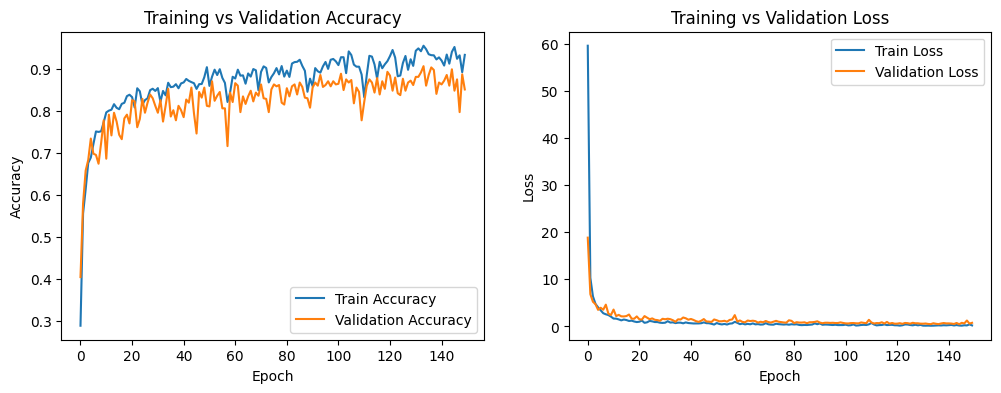

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))

# Plot Akurasi
plt.subplot(1, 2, 1)
plt.plot(history.history['categorical_accuracy'], label='Train Accuracy')
plt.plot(history.history['val_categorical_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training vs Validation Accuracy')

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training vs Validation Loss')

plt.show()

In [29]:
# Evaluasi model dengan data uji
loss, accuracy = model.evaluate(X_test, Y_test)

# Tampilkan hasil evaluasi
print(f"Loss pada data uji: {loss:.2f}")
print(f"Akurasi pada data uji: {accuracy:.2f}")


21/21 [==============================] - 0s 3ms/step - loss: 0.7578 - categorical_accuracy: 0.8503
Loss pada data uji: 0.76
Akurasi pada data uji: 0.85


<h1>Do prediction</h1>

In [ ]:
poses_mapping = {'A1_benar': 0, 'A1_salah': 1,'A2_benar': 2, 'A2_salah':3, 'A3_benar': 4, 'A3_salah':5, 'A4_benar':6, 'A4_salah':7, 'A5_benar':8, 'A5_salah':9, 'A6_benar':10, 'A6_salah':11, 'A7_benar':12, 'A7_salah':13 }

21/21 [==============================] - 0s 2ms/step


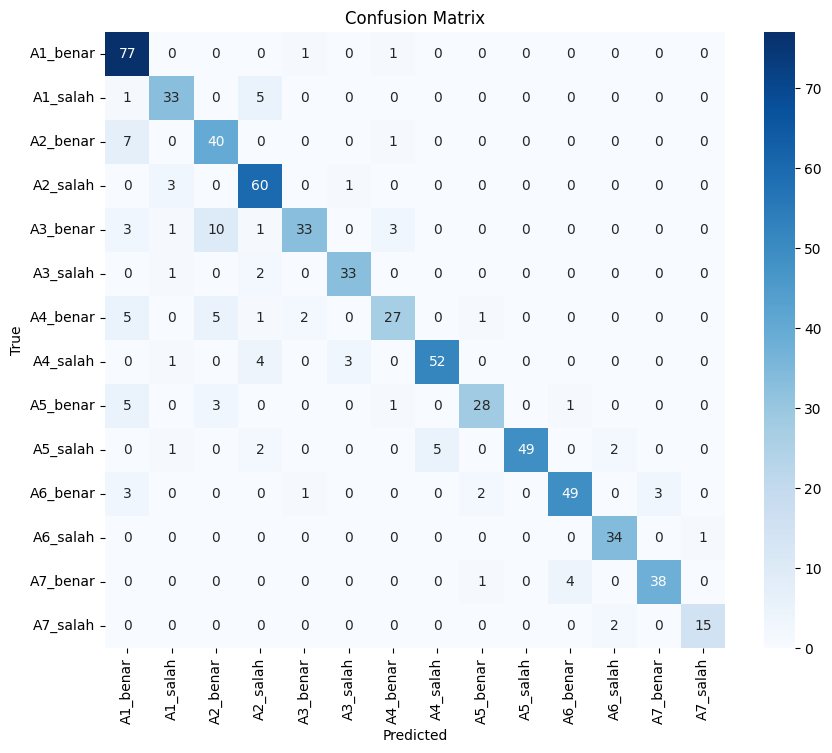

In [20]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Prediksi kelas untuk data uji
Y_pred = model.predict(X_test)
y_pred_classes = np.argmax(Y_pred, axis=1)
y_true = np.argmax(Y_test, axis=1)

# Mendapatkan matriks kebingungan
confusion_mtx = confusion_matrix(y_true, y_pred_classes)

# Menampilkan matriks kebingungan dengan heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap='Blues', 
            xticklabels=poses_mapping, yticklabels=poses_mapping)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [21]:
poses_label = {'A1_benar': 0, 'A1_salah': 1,'A2_benar': 2, 'A2_salah':3, 'A3_benar': 4, 'A3_salah':5, 'A4_benar':6, 'A4_salah':7, 'A5_benar':8, 'A5_salah':9, 'A6_benar':10, 'A6_salah':11, 'A7_benar':12, 'A7_salah':13 }

In [22]:
from sklearn.metrics import classification_report
classification_rep = classification_report(y_true, y_pred_classes, target_names=poses_label)
print(classification_rep)

              precision    recall  f1-score   support

    A1_benar       0.76      0.97      0.86        79
    A1_salah       0.82      0.85      0.84        39
    A2_benar       0.69      0.83      0.75        48
    A2_salah       0.80      0.94      0.86        64
    A3_benar       0.89      0.65      0.75        51
    A3_salah       0.89      0.92      0.90        36
    A4_benar       0.82      0.66      0.73        41
    A4_salah       0.91      0.87      0.89        60
    A5_benar       0.88      0.74      0.80        38
    A5_salah       1.00      0.83      0.91        59
    A6_benar       0.91      0.84      0.88        58
    A6_salah       0.89      0.97      0.93        35
    A7_benar       0.93      0.88      0.90        43
    A7_salah       0.94      0.88      0.91        17

    accuracy                           0.85       668
   macro avg       0.87      0.85      0.85       668
weighted avg       0.86      0.85      0.85       668



In [23]:
# poses_mapping = {'A1': 0, 'A2': 1, 'A3': 2, 'A4': 3, 'A5': 4, 'A6': 5, 'A7': 6}
# result = model.predict(X_test)

# print("Predicted pose:", poses_mapping[np.argmax(result[0])])
# print("Actual pose:", poses_mapping[np.argmax(Y_test[0])])

<h3>Save the model</h3>

In [24]:
model.save('./model_save/modelnn.h5')

c:\Users\Windows 10\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
